In [2]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [23]:
#Lets read the data in
df1=pd.read_csv ("LT_processed_data.csv")

In [24]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [25]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [26]:
summary_table(df1)

Dataset Shape: (1124, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,object,0,4
3,EngineeringGroup,object,0,6
4,PlanResourceTypeName,object,0,31
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,14
9,PlanIntentName,object,0,7


In [27]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [28]:
#Lets fix the datatypes of each feature (Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
bool_features_list

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [29]:
categorical_features_list= [feature for feature in df1.columns if df1[feature].dtype =="object"]
aditional= ['SKU Avaliable Flag','DeploymentSeverity']
categorical_features_list=categorical_features_list+ aditional
categorical_features_list

['NewDCFlag',
 'ColoReady At PlanReservationStart Flag',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsAddRack',
 'IsFirstFootprint',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKUCategoryName',
 'SKU Avaliable Flag',
 'DeploymentSeverity']

In [31]:
df1[categorical_features_list] = df1[categorical_features_list].astype('object')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1124 non-null   object 
 1   ColoReady At PlanReservationStart Flag  1124 non-null   object 
 2   DeploymentSeverity                      1124 non-null   object 
 3   EngineeringGroup                        1124 non-null   object 
 4   PlanResourceTypeName                    1124 non-null   object 
 5   IsAddRack                               1124 non-null   object 
 6   IsFirstFootprint                        1124 non-null   object 
 7   IsNPI                                   1124 non-null   object 
 8   PlanGEO                                 1124 non-null   object 
 9   PlanIntentName                          1124 non-null   object 
 10  NumberOfRacks                           1124 non-null   int6

In [33]:
df1.describe()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1124.000000,1124.000000,1124.000000,1124.000000
mean,11.868327,275.290036,182.361210,75.794484
std,8.126258,264.988461,102.797588,42.618329
min,1.000000,2.000000,15.000000,0.000000
25%,2.000000,40.000000,113.000000,49.000000
50%,10.000000,200.000000,155.000000,66.000000
75%,20.000000,450.000000,230.250000,99.000000
max,60.000000,2112.000000,895.000000,262.000000


In [38]:
min_thresold, max_thresold = df1['CT Signal to LIve'].quantile([0.000, 0.995])
min_thresold, max_thresold

(15.0, 575.1649999999997)

In [45]:
df1[df1['CT Signal to LIve']>max_thresold].shape

(6, 21)

In [40]:
Q1=df1['CT Signal to LIve'].quantile(0.25)
Q3=df1['CT Signal to LIve'].quantile(0.75)
Q1,Q3

(113.0, 230.25)

In [41]:
IQR=Q3-Q1
IQR

117.25

In [42]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-62.875, 406.125)

In [44]:
df1[df1['CT Signal to LIve']>upper_limit].shape

(46, 21)

In [46]:
upper_limit1 = df1['CT Signal to LIve'].mean() + 3*df1['CT Signal to LIve'].std()
upper_limit1

490.753973002976

In [47]:
df1[df1['CT Signal to LIve']>upper_limit1].shape

(18, 21)

In [48]:
df1[df1['CT Signal to LIve']>upper_limit1]

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
4,False,missing,5,Azure,Xtransport,missing,False,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0
5,False,missing,5,Azure,Xtransport,missing,False,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,548.0,49.0
23,False,missing,5,Azure,Xtransport,missing,False,False,USGov,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,525.0,49.0
30,False,missing,5,Azure,XIO Compute,No,False,False,Canary (US),Growth,20,880.0,99-ZZ No Priority,Azure Compute US,Rare_var,Not Restricted,Satellite,0,PreRack,509.0,49.0
31,False,missing,5,Azure,Xtransport,missing,False,False,USGov,Growth,1,14.0,99-ZZ No Priority,Rare_var,USGov Virginia,Restricted,Hub,0,PreRack,524.0,49.0
37,True,missing,5,Azure,Compute,No,True,False,Canary (US),Growth,20,460.0,99-ZZ No Priority,Azure Compute US,Rare_var,Not Restricted,Satellite,0,PreRack,492.0,31.0
39,False,missing,5,Azure,Compute,No,False,False,United States,Growth,20,720.0,99-ZZ No Priority,Azure Compute US,Central US,Not Restricted,Hub,0,PreRack,690.0,31.0
83,False,missing,5,Azure,Xtransport,Yes,False,False,INDIA,Growth,1,14.0,99-ZZ No Priority,Azure Storage APAC,Rare_var,Not Restricted,Satellite,0,PreRack,496.0,49.0
142,False,No,5,Azure,HPC,No,False,False,United States,Growth,18,612.0,99-ZZ No Priority,Azure HPC,North Central US,Not Restricted,Hub,0,PreRack,499.0,49.0
242,False,missing,5,Azure,Xarchive,Yes,False,False,USGov,Growth,2,24.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,895.0,262.0


In [49]:
#removal of outliers in CT_To_Live feature by considering IQR method 
df2= df1[(df1['CT Signal to LIve']<upper_limit)]

In [50]:
df2.describe()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1078.000000,1078.000000,1078.000000,1078.000000
mean,11.909091,274.389610,168.326531,75.228200
std,8.089511,264.233286,75.717840,41.229298
min,1.000000,2.000000,15.000000,0.000000
25%,3.000000,46.000000,113.000000,48.000000
50%,10.000000,200.000000,150.000000,66.000000
75%,20.000000,440.000000,217.000000,98.000000
max,60.000000,2112.000000,406.000000,254.000000


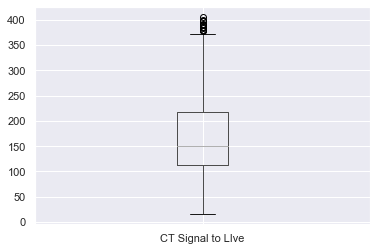

In [51]:
df2.boxplot(column="CT Signal to LIve") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

In [52]:
df2.shape

(1078, 21)

In [53]:
df2.to_csv("LT_Processed_without_Outliers.csv",index=0,columns=df2.columns)